In [229]:
import matplotlib.pyplot as pltt #intentar para el pair anterior
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro, kstest
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [230]:
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

Partiendo del conjuntos de datos contestad a las siguientes preguntas:

La variable price representa el precio de los productos. Calcula tanto la media como la mediana de los precios y explica la diferencia entre ambas medidas. Proporciona ejemplos de situaciones en las que la mediana podría ser preferible sobre la media.

Crea una tabla de correlación que muestre cómo se relacionan las variables price, retail_price, units_sold, rating_sold, y rating_count. Interpreta los resultados y discute si hay alguna correlación significativa entre estas variables.

Utiliza una tabla de contingencia para analizar la relación entre las variables categóricas uses_ad_boosts y badge_product_quality. ¿Cómo afecta la calidad del producto al uso de anuncios promocionales? Proporciona interpretaciones basadas en la tabla de contingencia.

Crea una tabla de contingencia que examine la relación entre las variables categóricas badge_local_product y badge_fast_shipping. ¿Hay alguna tendencia en la que los productos locales estén más asociados con envíos rápidos? Explícalo.

Calcula la media y la mediana de la variable mean_product_prices. ¿Cómo se comparan estas medidas? ¿Qué puedes inferir sobre la distribución de los precios promedio de los productos?

Realiza un análisis de correlación entre total_units_sold y mean_product_ratings_count. ¿Existe una relación entre la cantidad total de unidades vendidas y la calificación promedio de los productos? Explica los resultados.

Crea una tabla de contingencia que examine la relación entre las variables categóricas badge_local_product y seller_reputation. ¿Cómo se relacionan las calificaciones de los empleados con la reputación del vendedor? Proporciona interpretaciones basadas en la tabla de contingencia.

Calcula la media y la mediana de la variable discount_percentage. ¿Qué puedes decir sobre los descuentos promedio en los productos? ¿Hay valores atípicos en esta variable?

Utiliza una tabla de contingencia para analizar cómo se relacionan las variables categóricas badge_fast_shipping y seller_reputation. ¿Qué puedes concluir sobre la distribución de las calificaciones altas?

In [231]:
df = pd.read_csv("merchant_fill_nonulls.csv")

In [232]:
df.head()

,Unnamed: 0,title,price,retail_price,units_sold,uses_ad_boosts,rating_sold,rating_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_id,product_url,product_id,listed_products,total_units_sold,mean_units_sold_per_product,rating_employee,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation,rating_four_count,rating_three_count,rating_two_count,rating_one_count,rating_five_count
0,0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,No,3.76,54,No,Buena,No,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,Livraison standard,4,No,34,50,CN,zgrdejia,Unknown,568,595097d6a26f6e070cb878d1,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,5e9ae51d43d6a96e303acdb0,1,100,100.0,4.129,568.0,16.00,14.00,54.0,14.29,Buena,8.0,10.0,1.0,9.0,26.0
1,1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.00,22,20000,Si,3.45,6135,No,Buena,No,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,Livraison standard,2,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/58940d436a0d3d5da4e95a38,58940d436a0d3d5da4e95a38,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-63.64,Regular,1027.0,1118.0,644.0,1077.0,2269.0
2,2,Nouvelle mode d'été femmes robe décontractée c...,4.90,8,1000,Si,3.83,99,No,Buena,No,"Summer,Fashion,Necks,Beach,Dress,Loose,beach d...",white,XXS,Livraison standard,1,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5df2576d68963c1660471f9a,5df2576d68963c1660471f9a,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-38.75,Regular,18.0,23.0,8.0,7.0,43.0
3,3,Summer Women s Fashion Lace Up Tie Pants Plus...,4.93,6,100,No,3.77,47,No,Buena,No,"Summer,Shorts,Lace,pants,Waist,Short pants,Yel...",red,S,Standard Shipping,1,No,41,50,CN,sarahouse,83% Positive Feedback,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5d58daef3159a812b05933d2,5d58daef3159a812b05933d2,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-17.83,Regular,7.0,8.0,5.0,5.0,22.0
4,4,Nouvelle mode d'été femmes robe décontractée c...,5.65,10,100,Si,2.86,7,No,Buena,No,"Summer,Fashion,Necks,Skirts,Dress,Loose,Women'...",black,XXS,Livraison standard,1,No,41,50,CN,sarahouse,83 % avis positifs,17752,56458aa03a698c35c9050988,https://www.wish.com/c/5e9fa7de39682a0043ab7898,5e9fa7de39682a0043ab7898,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-43.50,Regular,1.0,2.0,2.0,1.0,1.0


EJERCICIO 1

media

In [233]:
media_price = round(df['price'].mean(),2)
media_price

8.33

mediana

In [234]:
mediana_price = round(df['price'].median(),2)
mediana_price

8.0

En este caso, la media y la mediana son similares. La media se ve influenciada por los valores atípicos por lo que a veces no cinviene usarla.

EJERCICIO 2

Crea una tabla de correlación que muestre cómo se relacionan las variables price, retail_price, units_sold, rating_sold, y rating_count. Interpreta los resultados y discute si hay alguna correlación significativa entre estas variables.

In [235]:
from itertools import combinations

numericas = df.select_dtypes(include=np.number)
numericas_comb = list(combinations(numericas, 2))
numericas_comb

[('Unnamed: 0', 'price'),
 ('Unnamed: 0', 'retail_price'),
 ('Unnamed: 0', 'units_sold'),
 ('Unnamed: 0', 'rating_sold'),
 ('Unnamed: 0', 'rating_count'),
 ('Unnamed: 0', 'shipping_option_price'),
 ('Unnamed: 0', 'countries_shipped_to'),
 ('Unnamed: 0', 'inventory_total'),
 ('Unnamed: 0', 'merchant_rating_count'),
 ('Unnamed: 0', 'listed_products'),
 ('Unnamed: 0', 'total_units_sold'),
 ('Unnamed: 0', 'mean_units_sold_per_product'),
 ('Unnamed: 0', 'rating_employee'),
 ('Unnamed: 0', 'merchant_ratings_count'),
 ('Unnamed: 0', 'mean_product_prices'),
 ('Unnamed: 0', 'mean_retail_prices'),
 ('Unnamed: 0', 'mean_product_ratings_count'),
 ('Unnamed: 0', 'discount_percentage'),
 ('Unnamed: 0', 'rating_four_count'),
 ('Unnamed: 0', 'rating_three_count'),
 ('Unnamed: 0', 'rating_two_count'),
 ('Unnamed: 0', 'rating_one_count'),
 ('Unnamed: 0', 'rating_five_count'),
 ('price', 'retail_price'),
 ('price', 'units_sold'),
 ('price', 'rating_sold'),
 ('price', 'rating_count'),
 ('price', 'shipping

In [236]:
variables = df[["price", "retail_price", "units_sold", "rating_sold", "rating_count"]]
numericas_comb = list(combinations(variables, 2))
numericas_comb

[('price', 'retail_price'),
 ('price', 'units_sold'),
 ('price', 'rating_sold'),
 ('price', 'rating_count'),
 ('retail_price', 'units_sold'),
 ('retail_price', 'rating_sold'),
 ('retail_price', 'rating_count'),
 ('units_sold', 'rating_sold'),
 ('units_sold', 'rating_count'),
 ('rating_sold', 'rating_count')]

In [237]:
matrix = variables.corr()
matrix

,price,retail_price,units_sold,rating_sold,rating_count
price,1.000000,0.304748,-0.024815,0.053469,-0.001911
retail_price,0.304748,1.000000,0.012638,0.024106,0.053872
units_sold,-0.024815,0.012638,1.000000,0.039478,0.899464
rating_sold,0.053469,0.024106,0.039478,1.000000,0.054112
rating_count,-0.001911,0.053872,0.899464,0.054112,1.000000


In [238]:
mascara = np.triu(np.ones_like(matrix, dtype=bool))

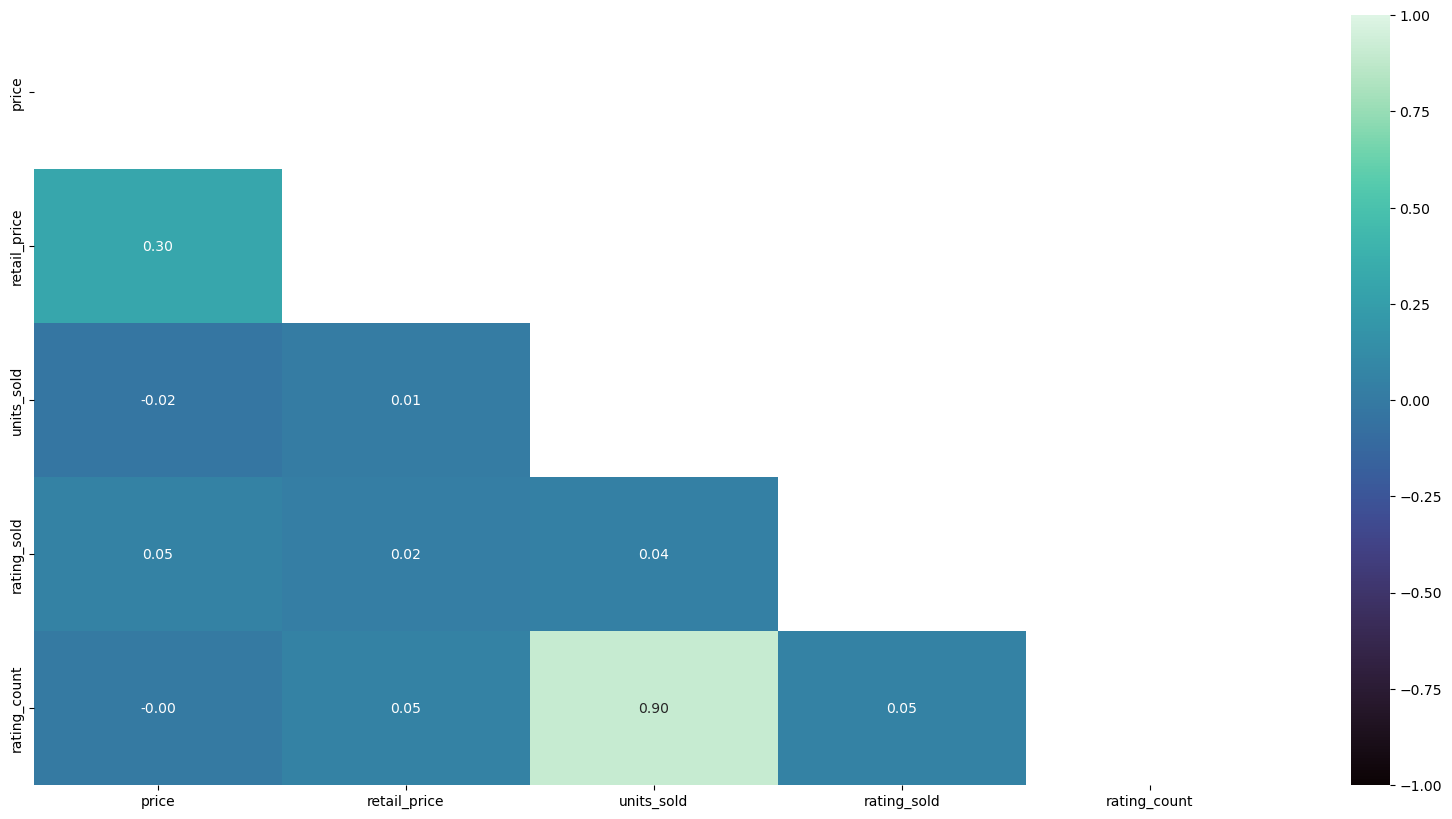

In [239]:
pltt.figure(figsize=(20,10))
sns.heatmap(matrix, annot=True, fmt='.2f', cmap= 'mako', vmin=-1, vmax='1', mask = mascara);

entre rating_count y units_sold hay una mayor correlación de tipo positiva.
única correlación negativa entre units-sold y price, pero es 0.
correlación leve entre retail_price y price

EJERCICIO 3

Utiliza una tabla de contingencia para analizar la relación entre las variables categóricas uses_ad_boosts y badge_product_quality. ¿Cómo afecta la calidad del producto al uso de anuncios promocionales? Proporciona interpretaciones basadas en la tabla de contingencia.

In [240]:
pd.crosstab(df['uses_ad_boosts'], df['badge_product_quality'])

badge_product_quality,Buena,Excelente
uses_ad_boosts,,
No,826,66
Si,630,51


In [241]:
pd.crosstab(df['uses_ad_boosts'], df['badge_product_quality'], normalize=True)*100

badge_product_quality,Buena,Excelente
uses_ad_boosts,,
No,52.511125,4.195804
Si,40.050858,3.242212


In [242]:
df["badge_product_quality"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1573 entries, 0 to 1572
Series name: badge_product_quality
Non-Null Count  Dtype 
--------------  ----- 
1573 non-null   object
dtypes: object(1)
memory usage: 12.4+ KB


In [243]:
df["badge_product_quality"].value_counts()

badge_product_quality
Buena        1456
Excelente     117
Name: count, dtype: int64

EJERCICIO 4

Crea una tabla de contingencia que examine la relación entre las variables categóricas badge_local_product y badge_fast_shipping. ¿Hay alguna tendencia en la que los productos locales estén más asociados con envíos rápidos? Explícalo.

In [244]:
pd.crosstab(df['badge_local_product'], df['badge_fast_shipping'])

badge_fast_shipping,No,Si
badge_local_product,,
No,1533,11
Si,20,9


In [245]:
pd.crosstab(df['badge_local_product'], df['badge_fast_shipping'], normalize=True)*100

badge_fast_shipping,No,Si
badge_local_product,,
No,97.457088,0.699301
Si,1.271456,0.572155


No, no hay relación entre las variables porque los productos que no tienen etiqueta local no suelen tener la etiqueta de fast shipping, y el fast shipping casi no se pide.

EJERCICIO 5

Calcula la media y la mediana de la variable mean_product_prices. ¿Cómo se comparan estas medidas? ¿Qué puedes inferir sobre la distribución de los precios promedio de los productos?

In [246]:
media_mean_product_prices = round(df['mean_product_prices'].mean(),2)
media_mean_product_prices

8.33

In [247]:
mediana_mean_product_prices = round(df['mean_product_prices'].median(),2)
mediana_mean_product_prices

8.0

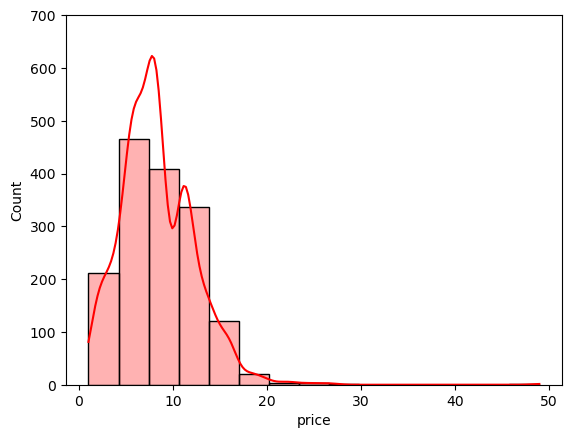

In [248]:
sns.histplot(data=df, x = 'price', bins = 15, kde=True, color='red', stat='count', alpha = 0.3);
pltt.ylim(0,700);

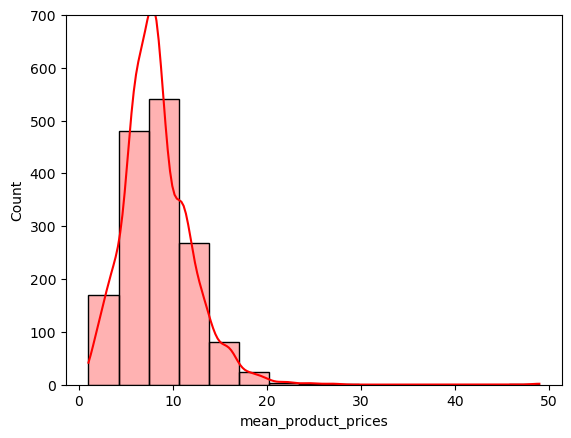

In [249]:
sns.histplot(data=df, x = 'mean_product_prices', bins = 15, kde=True, color='red', stat='count', alpha = 0.3);
pltt.ylim(0,700);

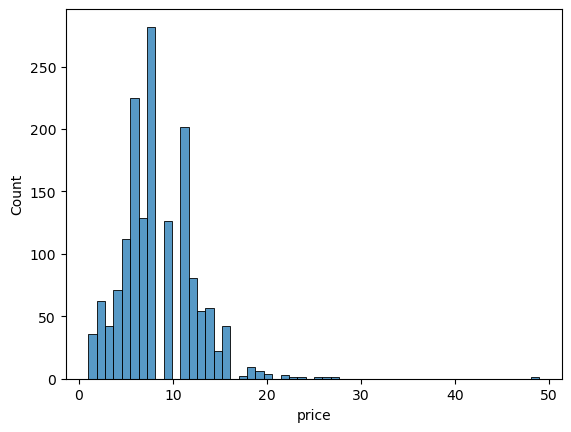

In [250]:
sns.histplot(data=df, x = 'price');

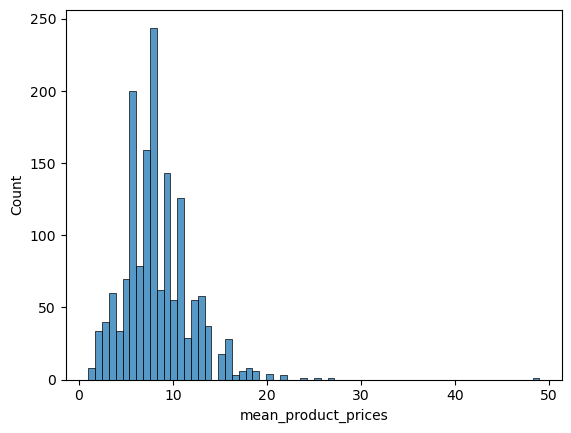

In [251]:
sns.histplot(data=df, x = 'mean_product_prices');

In [252]:
df["mean_product_prices"].value_counts()

mean_product_prices
8.00     197
11.00    115
7.00      93
9.00      84
6.00      76
        ... 
1.68       1
3.93       1
4.68       1
3.84       1
27.00      1
Name: count, Length: 193, dtype: int64

In [253]:
df["price"].value_counts()

price
8.00     282
11.00    202
7.00     129
9.00     126
6.00     120
        ... 
4.74       1
2.83       1
2.76       1
4.73       1
27.00      1
Name: count, Length: 127, dtype: int64

Igual que en la variable, price, la media y la mediana son my similares. El promedio del precio de los productos no es demasiado alto, va aprox. de 5 a 10.

EJERCICIO 6

Realiza un análisis de correlación entre total_units_sold y mean_product_ratings_count. ¿Existe una relación entre la cantidad total de unidades vendidas y la calificación promedio de los productos? Explica los resultados.

In [254]:
titanic = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/titanic_train.csv")
blood = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/blood_pressure.csv")
salaries = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/data_science_salaries.csv")

1. El valor p
El p-value es la probabilidad de obtener un resultado igual o más extremo que el observado, asumiendo que la hipótesis nula es cierta.
p pequeño → el resultado es raro bajo H₀ → hay evidencia en contra de H₀.
p grande → el resultado es común bajo H₀ → no hay evidencia suficiente para dudar de H₀.
2. Nivel de significancia (α)
Es un umbral que fijamos (usualmente 0.05 o 5%) que define el riesgo máximo que estamos dispuestos a aceptar de cometer un error tipo I (rechazar H₀ cuando en realidad es cierta).
3. Comparación p-value vs α
Si p ≤ α: el resultado observado sería muy raro si H₀ fuera cierta → rechazamos H₀.
Si p > α: el resultado no es raro bajo H₀ → no hay evidencia suficiente para rechazarla → se “acepta” H₀ (más correctamente, no se rechaza).

ESTADISTICA INFERENCIAL

EJERCICIO 1

Ejercicios intervalo de confianza: Para cada uno de los ejercicios interpreta los resultados y piensa que ventaja a nivel de negocio podemos sacar de calcularlo.

Trabajas para una plataforma de comercio en línea y deseas determinar el intervalo de confianza al 95% para el precio promedio de productos con una cantidad de media de valoraciones al producto de 500.

In [255]:
df.columns

Index(['Unnamed: 0', 'title', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating_sold', 'rating_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'origin_country', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_id',
       'product_url', 'product_id', 'listed_products', 'total_units_sold',
       'mean_units_sold_per_product', 'rating_employee',
       'merchant_ratings_count', 'mean_product_prices', 'mean_retail_prices',
       'mean_product_ratings_count', 'discount_percentage',
       'seller_reputation', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'rating_five_count'],
      dtype='object')

In [256]:
df_filtrado = df[df["mean_product_ratings_count"] > 500]
media = df_filtrado['mean_product_prices'].mean()
std = df_filtrado['mean_product_prices'].std()
media

8.288690095846645

In [257]:
# 2. Calculamos la desviación estandard (std)

n = len(df_filtrado) # no se toman todas las filas por el filtro anterior, condicion

confidence = 0.95

In [258]:
mean_mean_product_prices

8.288690095846645

In [259]:

# Calcular el intervalo de confianza al 95%
confidence_interval = stats.t.interval(
    confidence=0.95,         # Nivel de confianza
    df=n-1,             # Grados de libertad
    loc=media,  # Media de la muestra
    scale=std/ np.sqrt(n)  # Error estándar de la media
)

# Mostrar el resultado
print(f"Media: {media.round(2)} dólares")
print(f"Intervalo de Confianza al 95%: {confidence_interval}")

Media: 8.29 dólares
Intervalo de Confianza al 95%: (8.044840597819896, 8.532539593873395)


EJERCICIO 2

Eres un analista de ventas en una plataforma de comercio electrónico y quieres calcular el intervalo de confianza al 90% para el número promedio de unidades vendidas por producto.

mean_units_sold_per_product

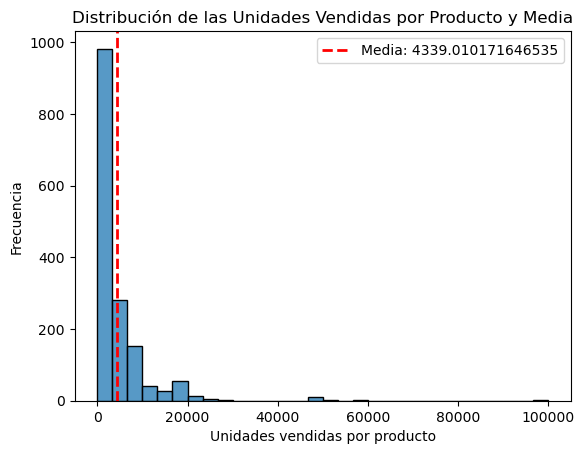

In [260]:
# 1. Vemos la distribución de edades junto con la media

media_units = df['mean_units_sold_per_product'].mean()

# Visualización: Histograma con la media
sns.histplot(df['mean_units_sold_per_product'], bins=30)
pltt.axvline(media_units, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_units}')

# Cambiar los nombres de los ejes
pltt.xlabel('Unidades vendidas por producto')
pltt.ylabel('Frecuencia')

# Cambiar el título del gráfico
pltt.title('Distribución de las Unidades Vendidas por Producto y Media')
pltt.legend()
pltt.show()

In [261]:
media_units

4339.010171646535

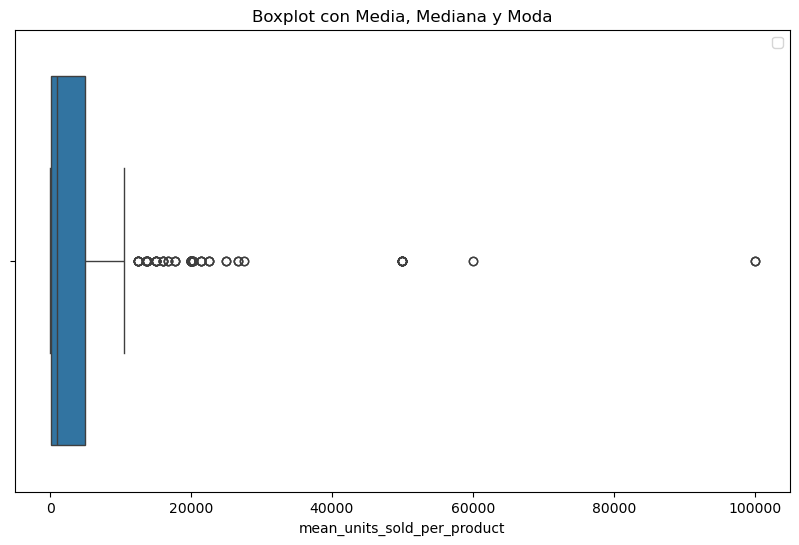

In [262]:
pltt.figure(figsize=(10, 6))
sns.boxplot(x=df['mean_units_sold_per_product'])



# Añadir leyenda y título
pltt.legend()
pltt.title('Boxplot con Media, Mediana y Moda')

# Mostrar el gráfico
pltt.show()

no es normal

Si queremos redondear los valores del intervalo de confianza, como devuelve una tupla con dos elementos, redondeamos cada elemento por separado:
confidence_interval[0].round(2), confidence_interval[1].round(2)

In [263]:
# 2. Calculamos la desviación estandard (std)

std_units = df['mean_units_sold_per_product'].std()
n = len(df['mean_units_sold_per_product'])

confidence = 0.90

In [264]:
std_units

8047.707932183456

In [265]:
media_units

4339.010171646535

In [266]:
# 4. Calculamos el intervalo de confianza

# Tamaño de la muestra
n = len('mean_units_sold_per_product')

# Calcular el intervalo de confianza al 90%
confidence_interval = stats.t.interval(
    confidence=confidence,         # Nivel de confianza
    df=n-1,             # Grados de libertad
    loc=media_units,  # Media de la muestra
    scale=std_units/ np.sqrt(n)  # Error estándar de la media
)

# Mostrar el resultado
print(f"Media: {media_units} unidades de producto")
print(f"Intervalo de Confianza al 90%: {confidence_interval}")

Media: 4339.010171646535 unidades de producto
Intervalo de Confianza al 90%: (1697.3796447708382, 6980.640698522231)


EJERCICIO 3

Trabajas en la gestión de inventario de una tienda en línea y necesitas calcular el intervalo de confianza al 99% para el precio promedio de productos según su país de origen.

In [268]:
df["origin_country"].unique()

array(['CN', 'US', 'VE', 'AT', 'SG', 'GB'], dtype=object)

In [269]:
paises = ['CN', 'US', 'VE', 'AT', 'SG', 'GB']

propuesta de chatgpt

In [271]:
for p in paises:
    # Filtrar por país
    datos_pais = df.loc[df['origin_country'] == p, 'mean_product_prices']
    
    # Calcular estadísticos básicos
    n = len(datos_pais)
    media = np.mean(datos_pais)
    std = np.std(datos_pais, ddof=1)  # desviación estándar muestral
    
    # Calcular intervalo de confianza al 99%
    confidence_interval = stats.t.interval(
        confidence=0.99,
        df=n-1,
        loc=media,
        scale=std/np.sqrt(n)   # error estándar
    )
    
    # Mostrar resultados
    print(f"País: {p}")
    print(f"  Media: {media}")
    print(f"  IC 99%: {confidence_interval}")
    print()

País: CN
  Media: 8.310900195694717
  IC 99%: (8.073957050652455, 8.54784334073698)

País: US
  Media: 9.397096774193548
  IC 99%: (8.03000904623894, 10.764184502148156)

País: VE
  Media: 8.298
  IC 99%: (-2.135262984769909, 18.73126298476991)

País: AT
  Media: 7.0
  IC 99%: (nan, nan)

País: SG
  Media: 3.38
  IC 99%: (nan, nan)

País: GB
  Media: 9.0
  IC 99%: (nan, nan)



otra opcion por adaptar

In [276]:
# 3. Agrupar por país y calcular estadísticas
resultados = df.groupby("origin_country").agg(
    n=("mean_product_prices", "count"),
    media_country=("mean_product_prices", "mean"),
    std_country=("mean_product_prices", "std")
)

In [279]:
# 2. Función para calcular IC al 99% usando t de Student
def intervalo_confianza(data, nivel=0.99):
    media = np.mean(data)
    n = len(data)
    sem = stats.sem(data)  # error estándar de la media
    ic = stats.t.interval(confidence=nivel, df=n-1, loc=media, scale=sem)
    return media, ic
# 3. Aplicar por país
resultados = {}
for pais, grupo in df.groupby("origin_country"):
    media, (ci_inf, ci_sup) = intervalo_confianza(grupo["mean_product_prices"])
    resultados[pais] = {
        "media": media,
        "n": len(grupo),
        "IC 99%": (ci_inf, ci_sup)
    }
# 4. Mostrar resultados
for pais, valores in resultados.items():
    print(f"{pais}: media={valores['media']:.2f}, n={valores['n']}, IC99%={valores['IC 99%']}")

AT: media=7.00, n=1, IC99%=(nan, nan)
CN: media=8.31, n=1533, IC99%=(8.073957050652455, 8.54784334073698)
GB: media=9.00, n=1, IC99%=(nan, nan)
SG: media=3.38, n=2, IC99%=(nan, nan)
US: media=9.40, n=31, IC99%=(8.03000904623894, 10.764184502148156)
VE: media=8.30, n=5, IC99%=(-2.135262984769909, 18.73126298476991)
